# **Tarea Nº 4**
Scope: APIs

Curso:          Fundamentos de Programación en Python para Macroeconomía y Finanzas     
Profesor:       Victor Fuentes Campos     

- Fecha y hora de entrega: Viernes 12 de enero, 11:59pm
- Agregue los nombres de las personas con las que discutió esta tarea: ____ Armando Paredes ______
- Envíe su tarea haciendo el `push` de su código a su repo en GitHub Classroom: 

The Central Bank Reserve of Perú (BCRP) holds a list of datasets that are among the most comprehensive for macroeconomic purposes. In this exercise, we'll retrieve data from the [BCRP API](https://estadisticas.bcrp.gob.pe/estadisticas/series/ayuda/api) and explore the impact of pandemics

## Before starting

- You must pull the necessary data using `get` and `requests`
- You are required to apply the concepts learned in the previous sessions (`pandas`, `if`, `loop`, `function`)
- Hint: here is the BCRP url structure for the APIs call:
```html
https://estadisticas.bcrp.gob.pe/estadisticas/series/api/[códigos de series]/[formato de salida]/[periodo inicial]/[periodo final]/[idioma]
```

## The very long run

1. Locate the "Estadísticas de 100 años del BCRP" section in the BCRP´s series data statistics [here](https://estadisticas.bcrp.gob.pe/estadisticas/series/index) and identify the necessary code for the serie **`PBI (Mill S/ 2007)`**. Later, add manually the annual GDP values for 2022 and 2023 (be careful with the units of data). Then, **calculate** the Peruvian annual GDP growth (%) since 1922 to 2023. Finally, plot it using a very simple graph through `matplotlib` and provide critical insights (no more than 100 words)

    Hint1: use `.json()` for exploring the `content`. Your data is inside `["periods"]`
    
    Hint2: the graph must looks something like this: <img src="growth_gdp_long_run.png" max-width="300">
    

In [234]:
# Solution

In [235]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [236]:
url_base = 'https://estadisticas.bcrp.gob.pe/estadisticas/series/api/'
cod_ser = 'PD39563DA'
formato = '/json'
per = '/1922/2021'

url = f'{url_base}{cod_ser}{formato}{per}'

In [237]:
response = requests.get(url)

In [238]:
response_json = response.json()

In [239]:
response_json.keys()

dict_keys(['config', 'periods'])

In [240]:
nombre_serie = response_json['config']['series'][0]['name']
nombre_serie

'PBI Sectorial - PBI (Mill S/ 2007)'

In [241]:
data_raw = response_json['periods']

fecha_list = []
pbi_list = []

for element in data_raw:
    fecha_list.append(element['name'])
    pbi_list.append(element['values'][0])

In [242]:
pbi_dict = {'fechas': fecha_list, 'pbi': pbi_list}
pbi_df = pd.DataFrame(pbi_dict)
pbi_df['pbi'] = pbi_df['pbi'].astype(float)

In [243]:
pbi_df

,fechas,pbi
0,1922,14122.032222
1,1923,14756.217373
2,1924,16069.798806
3,1925,16575.199473
4,1926,18130.193094
...,...,...
95,2017,514215.000000
96,2018,534665.000000
97,2019,546605.000000
98,2020,486402.086278


In [244]:
pbi_2022 = 1.027*pbi_df['pbi'].iloc[99]
pbi_2023 = 0.995*pbi_2022

In [245]:
pbi_procesado = pd.concat( [ pbi_df , pd.DataFrame({'fechas':["2022", "2023"], 'pbi':[pbi_2022, pbi_2023]}) ], ignore_index=True ) 

In [246]:
pbi_procesado['pbi'] = pbi_procesado['pbi']

In [247]:
pbi_procesado['var_pbi'] = pbi_procesado['pbi'].pct_change() 

In [248]:
pbi_procesado['fechas'] = pbi_procesado['fechas'].astype(int)

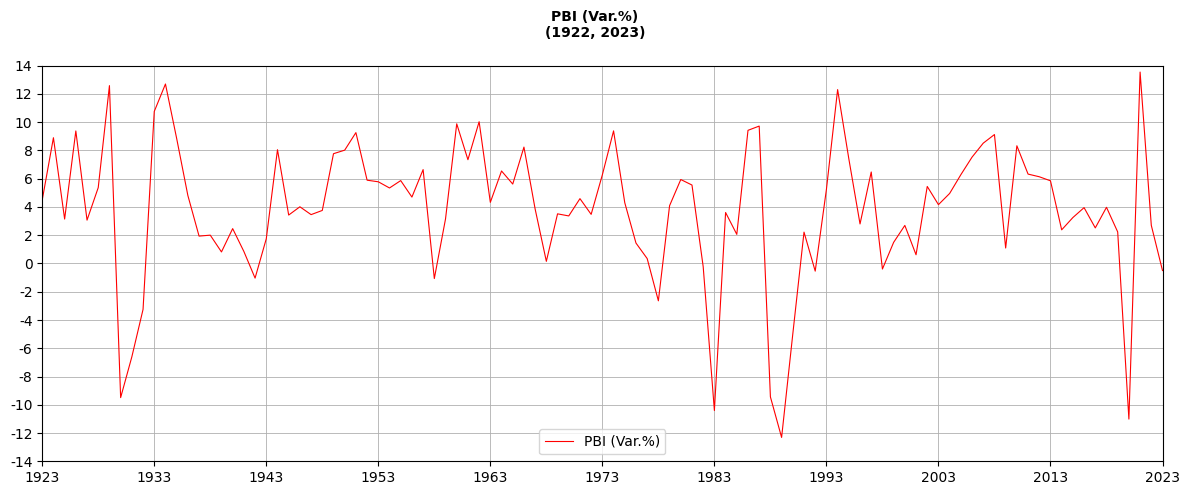

In [249]:
fig, axs = plt.subplots(1,1, figsize=(12, 5), tight_layout=True)

fig.suptitle('PBI (Var.%)\n(1922, 2023)', weight='bold', fontsize='medium')


axs.plot(pbi_procesado['fechas'], pbi_procesado['var_pbi'], color='red', linewidth=0.8, label='PBI (Var.%)')


axs.yaxis.set_major_formatter(lambda x, pos: f'{round(x*100)}')
axs.set_xticks(range(1923, 2024, 10))
axs.set_yticks(list(np.arange(-0.14, 0.15, 0.02)))
axs.set_ylim(-0.14, 0.14)
axs.grid(True, linewidth=0.6)
axs.set_xlim(1923, 2023)
axs.legend(loc='lower center')

plt.show()

## The hitman

2. Retrieve the up-to-date data for the monthly GDP in index (2007=100) from this [link](https://estadisticas.bcrp.gob.pe/estadisticas/series/mensuales/producto-bruto-interno-y-demanda-interna-variaciones-indice-2007). Then, calculate the the 5-year average monthly growth previous to the pandemics (ending in Feb-2020) for the 12-month rolling mean of the index, and project the alternative scenario of the Peruvian economy without the COVID-19. Then plot them out and provide insight from the gap between the real data and the pre-pandemic trend.

    Hint1: You may use the regression type of your election, but the OLS is recommended. 
    
    Hint2: Your plot should look somethig like this. You aren´t required to add flags/annotations/texts inside the graph <img src="growth_gdp_pandemics.png" max-width="300">

    Hint3: For more details about calculation, review this post from [The Economist](https://www.economist.com/graphic-detail/2021/10/28/americas-post-covid-economic-recovery-suffers-a-setback)
    


In [250]:
# Solution

In [251]:
import datetime

In [252]:
url_base = 'https://estadisticas.bcrp.gob.pe/estadisticas/series/api/'
cod_ser = 'PN01770AM'
formato = '/json'
per = '/2014-1/2023-10'

url = f'{url_base}{cod_ser}{formato}{per}'

In [253]:
response = requests.get(url)
response_json = response.json()
response_json.keys()

dict_keys(['config', 'periods'])

In [254]:
nombre_serie = response_json['config']['series'][0]['name']
nombre_serie

'Producto bruto interno y demanda interna (índice 2007=100) - PBI'

In [255]:
data_raw = response_json['periods']

fecha_list = []
pbi_list = []

for element in data_raw:
    fecha_list.append(element['name'])
    pbi_list.append(element['values'][0])

In [256]:
pbi_dict = {'fechas': fecha_list, 'pbi_mensual': pbi_list}
pbi_df = pd.DataFrame(pbi_dict)
pbi_df['pbi_mensual'] = pbi_df['pbi_mensual'].astype(float)

In [257]:
meses = {'Ene.': 'Jan. ', 'Feb.': 'Feb. ', 'Mar.': 'Mar. ', 'Abr.': 'Apr. ', 'May.': 'May. ', 'Jun.': 'Jun. ',
         'Jul.': 'Jul. ', 'Ago.': 'Aug. ', 'Sep.': 'Sep. ', 'Oct.': 'Oct. ', 'Nov.': 'Nov. ', 'Dic.': 'Dec. '}

In [258]:
pbi_df['fechas'] = pbi_df['fechas'].replace(meses, regex=True)

In [259]:
pbi_df['fechas'] = pd.to_datetime(pbi_df['fechas'], format='%b. %Y')

In [260]:
pbi_df['pbi_des_mensual'] = pbi_df['pbi_mensual'].rolling(window=12).mean()

In [261]:
pbi_df['pbi_des_mensual']

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
113    177.103408
114    176.926177
115    176.848477
116    176.651824
117    176.526213
Name: pbi_des_mensual, Length: 118, dtype: float64

In [262]:
pbi_df.loc[(pbi_df['fechas']=='2020-02')]['pbi_des_mensual']

73    172.012284
Name: pbi_des_mensual, dtype: float64

In [263]:
pbi_df = (
    pbi_df
    .assign(
        pbi_month_feb_2020_index= lambda x: ( ( pbi_df['pbi_des_mensual'] * 100 ) / pbi_df.loc[(pbi_df['fechas']=='2020-02')]['pbi_des_mensual'].values ) 
        )
        .dropna()
)

In [264]:
import statsmodels.api as sm

In [265]:
pbi_df

,fechas,pbi_mensual,pbi_des_mensual,pbi_month_feb_2020_index
11,2014-12-01,159.976450,146.168723,84.975747
12,2015-01-01,138.197687,146.345675,85.078619
13,2015-02-01,137.470300,146.485086,85.159666
14,2015-03-01,148.339778,146.837408,85.364489
15,2015-04-01,152.038605,147.346845,85.660653
...,...,...,...,...
113,2023-06-01,177.334725,177.103408,102.959745
114,2023-07-01,175.480990,176.926177,102.856711
115,2023-08-01,178.066866,176.848477,102.811539
116,2023-09-01,179.973753,176.651824,102.697214


In [266]:
dates = pd.date_range(start='2014-12-01	', end='2020-02-01', freq='M')
y= pbi_df.loc[pbi_df['fechas']<'2020-02-01', 'pbi_month_feb_2020_index']
x = np.arange(len(dates))
X = sm.add_constant(x)
model = sm.OLS(y, X)
results = model.fit()

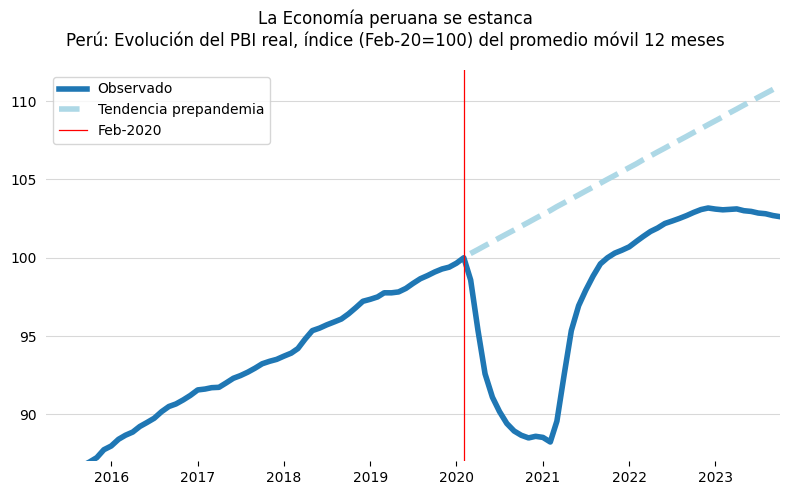

In [268]:
future_dates = pd.date_range(start='2020-02-01', end='2023-10-01', freq='M')
future_x = np.arange(len(dates), len(dates) + len(future_dates))
future_X = sm.add_constant(future_x)
future_y_pred = results.predict(future_X)



data_to_plot = pbi_df[['fechas', 'pbi_month_feb_2020_index']]
fig, axs = plt.subplots(1, 1, figsize=(8, 5), tight_layout=True)

fig.suptitle('La Economía peruana se estanca\nPerú: Evolución del PBI real, índice (Feb-20=100) del promedio móvil 12 meses')

axs.plot(data_to_plot['fechas'], data_to_plot['pbi_month_feb_2020_index'], linewidth=4, label='Observado')
axs.plot(future_dates, future_y_pred, '--', linewidth=4, color= 'lightblue', label = 'Tendencia prepandemia')
axs.axvline(x=datetime.date(2020, 2, 1), color='red',alpha=1, linewidth=0.9, label = 'Feb-2020')

axs.set_ylim([87, 112])

axs.set_xlim([datetime.date(2015, 4, 1), datetime.date(2023, 10, 1)])
axs.tick_params(labelrotation=0, left=False)
axs.legend(loc='upper left')
axs.spines[['top', 'bottom', 'left', 'right']].set_visible(False)
axs.yaxis.grid(True, linestyle='-', which='major', color='gray', alpha=0.3)

plt.show()

## The winners

- Based on the [Nasdaq Stock Screener](https://www.nasdaq.com/market-activity/stocks/screener), identify the three largest companies in the three larger sectors defined by market cap
- Elaborate a list/dictionary/series (what ever you think is more suitable) containing all tickers (or symbols) and sectors from these companies.
- So far, you can download data from Nasdaq, web scrape it or copy it manually. It doesn´t matter
- Then, use `yfinance` library to retrieve the market data for all the 9 firms
- Construct a table with the most common *institucional holders* by sector. Is there any interesting pattern? Hint: loop the `institutional_holders` from `yfinance`
- Calculate the distribution of the daily percentage returns for the 3 larger companies (defined by market cap) along the last 5 years. Plot your results (feel free to find the most appealing way to represent them) and provide critical insights

$$
  percentage\_return_{t} = \frac{price_t-price_{t-1}}{price_t}*100+dividends (\%)
$$

- Hint1: you can find the `dividens` through the `yfinance`'s 
`Ticker()`
- Hint2: some firms may not be paying dividends

In [ ]:
# Solution